In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from catboost import CatBoostRanker, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score, accuracy_score
from copy import deepcopy

In [3]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.2 MB/s eta 0:00:00


__Загрузка данных__

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [7]:
df=pd.read_csv('intern_task.csv')

In [249]:
df.head()

rank  query_id  feature_0  feature_1  feature_2  feature_3  feature_4  \
0     0        10        1.0        0.0        1.0        3.0        3.0   
1     1        10        3.0        0.0        3.0        0.0        3.0   
2     0        10        3.0        0.0        2.0        0.0        3.0   
3     1        10        3.0        0.0        3.0        0.0        3.0   
4     2        10        3.0        0.0        3.0        1.0        3.0   

   feature_5  feature_6  feature_7  ...  feature_134  feature_135  \
0   0.333333        0.0   0.333333  ...          0.0     0.000000   
1   1.000000        0.0   1.000000  ...          0.0     0.000000   
2   1.000000        0.0   0.666667  ...          0.0     0.000000   
3   1.000000        0.0   1.000000  ...          0.0     0.000000   
4   1.000000        0.0   1.000000  ...        273.0    79.670665   

   feature_136  feature_137  feature_138  feature_139  feature_140  \
0     0.454545     0.890238     8.655534     1.000000     0.077778   
1     0.000000     0.773976    23.130514     0.000000     0.027826   
2     0.000000     0.918308    13.351339     0.000000     0.014925   
3     0.000000     0.975355    18.240926     0.000000     0.053140   
4     0.200000     0.990119    31.786048     0.333333     0.046512   

   feature_141  feature_142  feature_143  
0     0.002222          1.0     0.333333  
1     0.000430         44.0    14.666667  
2     0.000104         22.0     7.333333  
3     0.000255          8.0     2.666667  
4     0.000307         24.0     8.000000  

[5 rows x 146 columns]

In [250]:
df.describe()

rank       query_id      feature_0      feature_1  \
count  235258.000000  235258.000000  235258.000000  235258.000000   
mean        0.677869   14828.413401       1.911960       0.206233   
std         0.830033    8193.945170       1.237374       0.579089   
min         0.000000      10.000000       0.000000       0.000000   
25%         0.000000    8215.000000       1.000000       0.000000   
50%         0.000000   14935.000000       2.000000       0.000000   
75%         1.000000   21580.000000       3.000000       0.000000   
max         4.000000   29995.000000      31.000000      18.000000   

           feature_2      feature_3      feature_4      feature_5  \
count  235258.000000  235258.000000  235258.000000  235258.000000   
mean        1.189847       0.550272       1.960082       0.803964   
std         1.037233       0.790947       1.203534       0.339955   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.666667   
50%         1.000000       0.000000       2.000000       1.000000   
75%         2.000000       1.000000       3.000000       1.000000   
max        27.000000       9.000000      31.000000       1.000000   

           feature_6      feature_7  ...   feature_134   feature_135  \
count  235258.000000  235258.000000  ...  2.352580e+05  2.352580e+05   
mean        0.097557       0.541174  ...  4.763432e+02  1.046698e+04   
std         0.266035       0.419973  ...  1.954840e+04  2.649584e+06   
min         0.000000       0.000000  ...  0.000000e+00  0.000000e+00   
25%         0.000000       0.000000  ...  0.000000e+00  0.000000e+00   
50%         0.000000       0.500000  ...  0.000000e+00  0.000000e+00   
75%         0.000000       1.000000  ...  1.000000e+00  4.000000e-01   
max         1.000000       1.000000  ...  1.731553e+06  8.000000e+08   

         feature_136    feature_137    feature_138    feature_139  \
count  235258.000000  235258.000000  235258.000000  235258.000000   
mean        0.070299       0.740710      11.067947       0.281747   
std         0.100721       0.352800      15.336861       0.392089   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.620522       0.000000       0.000000   
50%         0.000000       0.926779       9.448900       0.000000   
75%         0.142857       0.999613      16.146733       0.500000   
max         0.818182       1.000000    2506.799764       1.000000   

         feature_140    feature_141    feature_142    feature_143  
count  235258.000000  235258.000000  235258.000000  235258.000000  
mean        0.027033       0.000269      22.457910       9.560379  
std         0.033351       0.002088      63.708018      14.347378  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.006703       0.000000       4.000000       2.000000  
50%         0.017761       0.000008      12.000000       5.500000  
75%         0.034954       0.000109      28.000000      12.000000  
max         0.711261       0.250000   15074.000000    1552.000000  

[8 rows x 146 columns]

Рассмотрим матрицу корреляции, оценим корреляцию свыше 99% и рассмотрим гипотезу о возможном исключении половины данных столбцов, для снижения размерности

In [8]:
# Вычисляем корреляционную матрицу
corr_matrix = df.iloc[:, 2:].corr()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        if abs(corr_matrix.iloc[i, j]) >= 0.99:
            high_corr_pairs.append((col1, col2))

print("Пары столбцов с корреляцией больше 0.99:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}")

Пары столбцов с корреляцией больше 0.5:
feature_8 - feature_20
feature_8 - feature_35
feature_10 - feature_14
feature_15 - feature_19
feature_16 - feature_17
feature_20 - feature_35
feature_24 - feature_142
feature_25 - feature_29
feature_30 - feature_34
feature_39 - feature_143
feature_40 - feature_44
feature_70 - feature_74
feature_75 - feature_79
feature_80 - feature_84
feature_85 - feature_89
feature_90 - feature_94
feature_110 - feature_114
feature_110 - feature_120
feature_111 - feature_121
feature_112 - feature_122
feature_113 - feature_123
feature_114 - feature_124
feature_115 - feature_119


In [9]:
list_cor=[]
for i, j in high_corr_pairs:
  list_cor.append(j)
list_cor

['feature_20',
 'feature_35',
 'feature_14',
 'feature_19',
 'feature_17',
 'feature_35',
 'feature_142',
 'feature_29',
 'feature_34',
 'feature_143',
 'feature_44',
 'feature_74',
 'feature_79',
 'feature_84',
 'feature_89',
 'feature_94',
 'feature_114',
 'feature_120',
 'feature_121',
 'feature_122',
 'feature_123',
 'feature_124',
 'feature_119']

In [10]:
df.columns[df.isnull().any()]#в таблице нет пропусков

Index([], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235258 entries, 0 to 235257
Columns: 146 entries, rank to feature_143
dtypes: float64(140), int64(6)
memory usage: 262.1 MB


In [255]:
df.iloc[:, 2:].duplicated().sum()

0

In [12]:
query_counts = df['query_id'].value_counts()

# Получить query_id, которые встречаются только 1 раз
query_one=query_counts[query_counts == 1].index.tolist()
query_one

[9265, 20560, 28285]

In [ ]:
df['rank'].groupby('query_id')

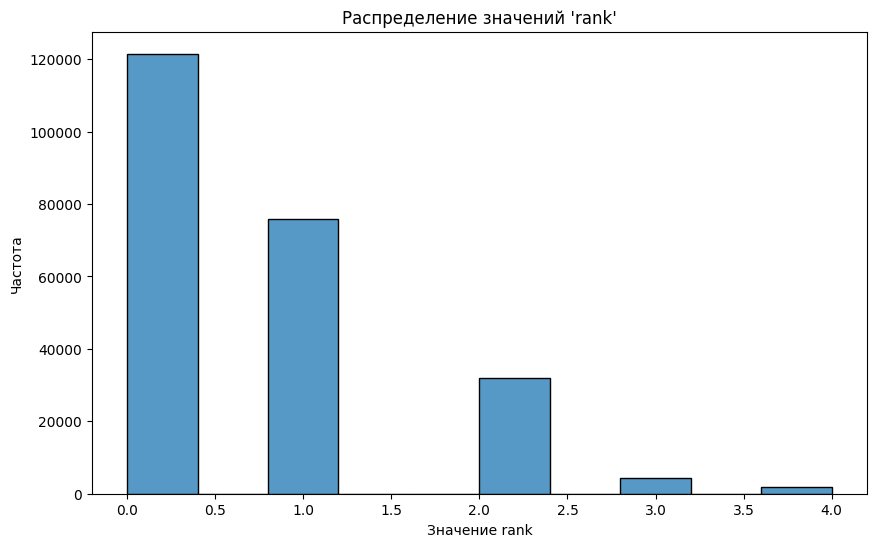

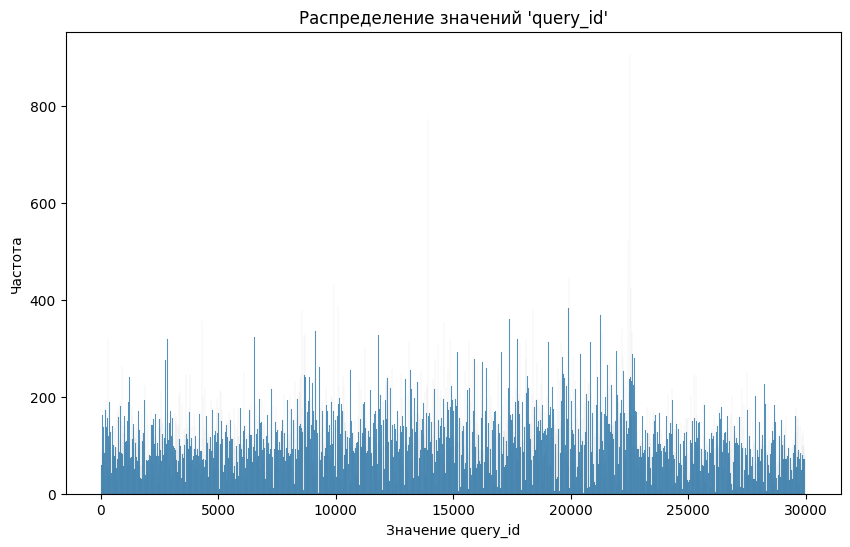

In [258]:
# Гистограмма распределения 'rank' в df
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rank', bins=10, kde=False)
plt.title('Распределение значений \'rank\'')
plt.xlabel('Значение rank')
plt.ylabel('Частота')
plt.show()

# Гистограмма распределения 'query_id' в df
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='query_id', bins=len(df['query_id'].unique()), kde=False)
plt.title('Распределение значений \'query_id\'')
plt.xlabel('Значение query_id')
plt.ylabel('Частота')
plt.show()

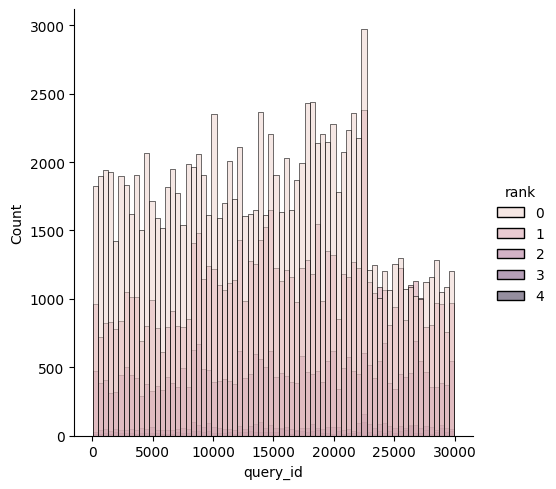

In [259]:
sns.displot(df, x="query_id", hue="rank")
plt.show()

Рассмотрим, есть ли столбцы с одинаковыми значениями, при ранжировании значимости они не имеют, так что удалим их

In [14]:
uniform_columns = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        uniform_columns.append(col)

print("Столбцы с одинаковыми значениями:")
print(uniform_columns)

df=df.drop(uniform_columns, axis=1)

Столбцы с одинаковыми значениями:
['feature_64', 'feature_65', 'feature_72', 'feature_100']


In [76]:
#unique_session_ids = df['query_id'].unique()
train_session_ids, test_session_ids = train_test_split(df, test_size=0.2, random_state=42)
train_session_ids=train_session_ids.sort_values(by=['query_id'])
test_session_ids=test_session_ids.sort_values(by=['query_id'])

In [77]:
X_train = train_session_ids.drop(['rank', 'query_id'], axis=1).values
y_train = train_session_ids['rank'].values.astype(float)
queries_train = train_session_ids['query_id']

X_test = test_session_ids.drop(['rank', 'query_id'], axis=1).values
y_test =test_session_ids['rank'].values.astype(float)
queries_test = test_session_ids['query_id']

In [78]:
train = Pool(
    data=X_train,
    label=y_train,
    group_id=queries_train
)

test = Pool(
    data=X_test,
    label=y_test,
    group_id=queries_test
)

In [79]:
default_parameters = {
    'iterations': 4000,
    'custom_metric': ['NDCG:top=5', 'AUC:type=Ranking', 'MAP:top=5'],
    'verbose': 100,
    'random_seed': 0,
    'use_best_model':True,
}

In [80]:
def fit_model(loss_function, additional_params=None, train_pool=train, test_pool=test):
    parameters = deepcopy(default_parameters)
    parameters['loss_function'] = loss_function
    parameters['train_dir'] = loss_function

    if additional_params is not None:
        parameters.update(additional_params)

    model = CatBoostRanker(**parameters)
    model.fit(train_pool, eval_set=test_pool,  early_stopping_rounds=1500, plot=True)

    print(model.get_best_score())

    return model

Оценим результат без учёта группировки данных через RMSE, и сравним последующие результаты с данным

In [ ]:
model_RMSE = fit_model('RMSE', {'train_dir': 'RMSE', 'iterations': 4000, 'learning_rate': 0.1})
model_RMSE.save_model('model_RMSE.model')

In [ ]:
model_QuerySoftMax = fit_model('QuerySoftMax',
 additional_params={'train_dir': 'QuerySoftMax',
                     'random_seed':9,
                     'iterations':7000,
                     'learning_rate':0.01,
                     'l2_leaf_reg':14,
                     'depth':4,
                     'thread_count':-1,
                     'use_best_model':True,
                     'random_strength':1,
                     'leaf_estimation_method':'Newton'
                                                })
model_QuerySoftMax.save_model('model_QuerySoftMax.model')

In [ ]:
model_LambdaMart = fit_model('LambdaMart', {'train_dir': 'LambdaMart', 'iterations': 3000, 'learning_rate': 0.1})
model_LambdaMart.save_model('model_LambdaMart.model')

В связи с горящими дедлайнами (сам виноват, признаю), символически рассмотрим модель PairLogit

In [87]:
model_PairLogit = fit_model('PairLogit', {'train_dir': 'PairLogit', 'iterations': 200, 'learning_rate': 0.1})
model_PairLogit.save_model('model_PairLogit.model')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6889561	test: 0.6887540	best: 0.6887540 (0)	total: 3.83s	remaining: 12m 41s
100:	learn: 0.6311655	test: 0.6347233	best: 0.6347233 (100)	total: 7m 1s	remaining: 6m 53s
199:	learn: 0.6044197	test: 0.6179153	best: 0.6179153 (199)	total: 14m 5s	remaining: 0us

bestTest = 0.6179153037
bestIteration = 199

{'learn': {'MAP:top=5': 0.6687001834250436, 'PairLogit': 0.6044197290898957}, 'validation': {'NDCG:top=5;type=Base': 0.6244688542691318, 'MAP:top=5': 0.5767165242165221, 'AUC:type=Ranking': 0.7102903463218173, 'PairLogit': 0.617915303663175}}


На данный момент RMSE выдаёт лучший результат, хотя как видно гиперпараметры моделей можно было бы улучшить, так как они не достигли переобучения(не говоря уже о PairLogit)

Проверим результаты при снижении размерности выбранными столбцами

In [88]:
X_train_drop = train_session_ids.drop(['rank', 'query_id']+list_cor, axis=1).values

X_test_drop = test_session_ids.drop(['rank', 'query_id']+list_cor, axis=1).values

train_d = Pool(
    data=X_train_drop,
    label=y_train,
    group_id=queries_train
)

test_d = Pool(
    data=X_test_drop,
    label=y_test,
    group_id=queries_test
)

In [ ]:
model_drop_RMSE = fit_model(
    'RMSE',
    additional_params={'train_dir': 'RMSE_drop', 'iterations': 4000, 'learning_rate': 0.1},
    train_pool=train_d,
    test_pool=test_d
                        )
model_drop_RMSE.save_model('model_drop_RMSE.model')

/usr/local/lib/python3.10/dist-packages/catboost/core.py:6346: RuntimeWarning: Regression loss ('RMSE') ignores an important ranking parameter 'group_id'
  warnings.warn("Regression loss ('{}') ignores an important ranking parameter 'group_id'".format(loss_function), RuntimeWarning)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8220199	test: 0.8194123	best: 0.8194123 (0)	total: 140ms	remaining: 9m 20s
100:	learn: 0.7460375	test: 0.7482135	best: 0.7482135 (100)	total: 14.8s	remaining: 9m 33s
200:	learn: 0.7332352	test: 0.7390300	best: 0.7390300 (200)	total: 29.2s	remaining: 9m 12s
300:	learn: 0.7240406	test: 0.7339869	best: 0.7339869 (300)	total: 43.9s	remaining: 8m 59s
400:	learn: 0.7161987	test: 0.7297569	best: 0.7297569 (400)	total: 58.8s	remaining: 8m 47s
500:	learn: 0.7094709	test: 0.7264610	best: 0.7264610 (500)	total: 1m 13s	remaining: 8m 35s
600:	learn: 0.7036292	test: 0.7241762	best: 0.7241762 (600)	total: 1m 28s	remaining: 8m 20s
700:	learn: 0.6981479	test: 0.7219297	best: 0.7219297 (700)	total: 1m 43s	remaining: 8m 8s
800:	learn: 0.6934723	test: 0.7206113	best: 0.7206113 (800)	total: 1m 58s	remaining: 7m 55s
900:	learn: 0.6888911	test: 0.7190397	best: 0.7190397 (900)	total: 2m 14s	remaining: 7m 42s
1000:	learn: 0.6847802	test: 0.7176645	best: 0.7176599 (999)	total: 2m 31s	remaining: 7m 3

Пропустим остальные модели

In [ ]:
#model_drop_LambdaMart = fit_model(
#   'LambdaMart',
#    additional_params={'train_dir': 'LambdaMart_drop', 'iterations': 4000, 'learning_rate': 0.1},
#    train_pool=train_d,
#    test_pool=test_d
#                        )
#model_drop_LambdaMart.save_model('model_drop_LambdaMart.model')

In [ ]:
#model_drop_QuerySoftMax = fit_model('QuerySoftMax',
# additional_params={'train_dir': 'QuerySoftMax_drop',
#                     'random_seed':9,
#                     'iterations':7000,
#                     'learning_rate':0.01,
#                     'l2_leaf_reg':14,
#                     'depth':4,
#                     'thread_count':-1,
#                     'use_best_model':True,
#                     'random_strength':1,
#                     'leaf_estimation_method':'Newton'},
#  train_pool=train_d,
#  test_pool=test_d)

#model_drop_QuerySoftMax.save_model('model_drop_QuerySoftMax.model')

Рассмотрим использование QuerySoftMax с весами групп

In [90]:
def create_weights(queries):
    query_set = np.unique(queries)
    weights = np.zeros(shape=queries.shape)

    for query_id in query_set:
        query_count = np.sum(queries == query_id)
        total_count = 5000
        weight = np.exp(1 - query_count / total_count) - 1 #установка веса в зависимости от числа запросов в сессии
        weights[queries == query_id] = weight

    return weights


train_with_weights = Pool(
    data=X_train,
    label=y_train,
    group_weight=create_weights(queries_train),
    group_id=queries_train
)

test_with_weights = Pool(
    data=X_test,
    label=y_test,
    group_weight=create_weights(queries_test),
    group_id=queries_test
)

In [91]:
model_weight_QuerySoftMax = fit_model(
    'QuerySoftMax',
     additional_params={'train_dir': 'QuerySoftMax_weight',
                     'random_seed':9,
                     'iterations':5000,
                     'learning_rate':0.05,
                     'l2_leaf_reg':14,
                     'depth':4,
                     'thread_count':-1,
                     'use_best_model':True,
                     'random_strength':1,
                     'leaf_estimation_method':'Newton'},
    train_pool=train_with_weights,
    test_pool=test_with_weights
)
model_weight_QuerySoftMax.save_model('model_weight_QuerySoftMax.model')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4.7245227	test: 3.3587069	best: 3.3587069 (0)	total: 343ms	remaining: 28m 34s
100:	learn: 4.6739960	test: 3.3111569	best: 3.3111569 (100)	total: 34.3s	remaining: 27m 41s
200:	learn: 4.6653566	test: 3.3040109	best: 3.3040109 (200)	total: 1m 6s	remaining: 26m 25s
300:	learn: 4.6598179	test: 3.2997557	best: 3.2997557 (300)	total: 1m 40s	remaining: 26m 9s
400:	learn: 4.6556340	test: 3.2966223	best: 3.2966223 (400)	total: 2m 6s	remaining: 24m 15s
500:	learn: 4.6522902	test: 3.2944073	best: 3.2944073 (500)	total: 2m 36s	remaining: 23m 23s
600:	learn: 4.6494749	test: 3.2928040	best: 3.2928040 (600)	total: 3m 21s	remaining: 24m 36s
700:	learn: 4.6469970	test: 3.2913683	best: 3.2913683 (700)	total: 3m 48s	remaining: 23m 20s
800:	learn: 4.6447741	test: 3.2902611	best: 3.2902611 (800)	total: 4m 15s	remaining: 22m 16s
900:	learn: 4.6426963	test: 3.2892917	best: 3.2892917 (899)	total: 4m 41s	remaining: 21m 20s
1000:	learn: 4.6408226	test: 3.2884834	best: 3.2884834 (1000)	total: 5m 7s	rema

показатель model_QuerySoftMax улучшился на валидации

Блендинг


In [93]:
y_train_drop_LambdaMart = model_LambdaMart.predict(X_train)
y_train_QuerySoftMax = model_weight_QuerySoftMax.predict(X_train)
y_train_PairLogit = model_PairLogit.predict(X_train)
y_train_RMSE=model_RMSE.predict(X_train)

y_test_drop_LambdaMart = model_LambdaMart.predict(X_test)
y_test_QuerySoftMax = model_weight_QuerySoftMax.predict(X_test)
y_test_PairLogit = model_PairLogit.predict(X_test)
y_test_RMSE=model_RMSE.predict(X_test)

In [99]:
# Обновленный набор данных для обучения
X_train_st = np.column_stack((
    y_train_drop_LambdaMart,
    y_train_QuerySoftMax,
    y_train_RMSE,
    y_train_PairLogit

))

# Обновленный набор данных для тестирования
X_test_st = np.column_stack((
    y_test_drop_LambdaMart,
    y_test_QuerySoftMax,
    y_test_RMSE,
    y_test_PairLogit
))

In [100]:
train_with_st = Pool(
    data=X_train_st,
    label=y_train,
    group_id=queries_train
)

test_with_st = Pool(
    data=X_test_st,
    label=y_test,
    group_id=queries_test
)

In [103]:
model_st_RMSE = fit_model(
    'PairLogit',
    additional_params={'train_dir': 'RMSE_st', 'iterations': 200, 'learning_rate': 0.1},
    train_pool=train_with_st,
    test_pool=test_with_st
                        )
model_st_RMSE.save_model('model_st_RMSE.model')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6319343	test: 0.6610684	best: 0.6610684 (0)	total: 3.83s	remaining: 12m 41s
100:	learn: 0.3682385	test: 0.6979828	best: 0.6037879 (7)	total: 7m 34s	remaining: 7m 25s
199:	learn: 0.3569899	test: 0.7324815	best: 0.6037879 (7)	total: 15m 12s	remaining: 0us

bestTest = 0.6037879107
bestIteration = 7

Shrink model to first 8 iterations.
{'learn': {'MAP:top=5': 0.9171827580456886, 'PairLogit': 0.3569898572433968}, 'validation': {'NDCG:top=5;type=Base': 0.6508224826905712, 'MAP:top=5': 0.596301742919388, 'AUC:type=Ranking': 0.7558976818302447, 'PairLogit': 0.6037879107374827}}


In [115]:
models=[model_RMSE, model_QuerySoftMax, model_LambdaMart, model_PairLogit, model_weight_QuerySoftMax, model_st_RMSE]
models_name=['model_RMSE', 'model_QuerySoftMax', 'model_LambdaMart', 'model_PairLogit', 'model_weight_QuerySoftMax', 'model_st_RMSE']

Реализуем функцию c преобразованием данных для оценки метрики NDCG_5 для всего датасета с учётом разбиения на группы

In [147]:
#первый вариант преобразования
def group_by_query_id1(y, query_id):
    unique_query_ids = np.unique(query_id)

    grouped_y = []
    max_length = 0

    for q_id in unique_query_ids:
        indices = np.where(query_id == q_id)[0]
        group_y = y[indices]
        max_length = max(max_length, len(group_y))
        grouped_y.append(group_y)

    # Заполнение списков нулями до максимальной длины
    for i, group in enumerate(grouped_y):
        if len(group) < max_length:
            grouped_y[i] = np.pad(group, (0, max_length - len(group)), 'constant', constant_values=0)

    return grouped_y

In [148]:
#второй вариант, с учётом нормализации от 0 до 4 только целые
def group_by_query_id2(y, query_id):
    unique_query_ids = np.unique(query_id)

    grouped_y = []
    max_length = 0

    # Найти минимальное и максимальное значение в y
    min_y = np.min(y)
    max_y = np.max(y)

    for q_id in unique_query_ids:
        indices = np.where(query_id == q_id)[0]
        group_y = y[indices]

        # Нормализовать группу в диапазон от 0 до 4
        group_y = (group_y - min_y) / (max_y - min_y) * 4

        # Округлить до целых значений
        group_y = np.clip(np.round(group_y), 0, 4)

        max_length = max(max_length, len(group_y))
        grouped_y.append(group_y)

    # Заполнение списков нулями до максимальной длины
    for i, group in enumerate(grouped_y):
        if len(group) < max_length:
            grouped_y[i] = np.pad(group, (0, max_length - len(group)), 'constant', constant_values=0)

    return grouped_y

In [154]:
def evaluate_model(model, X_test=X_test, y_test=y_test, queries_test=queries_test):

    y_pred = model.predict(X_test)
    y_pred = group_by_query_id1(y_pred, queries_test)
    y_test = group_by_query_id1(y_test, queries_test)

    #закоментировать для group_by_query_id2
    y_pred=np.array(y_pred).argsort().argsort()+1

    ndcg = ndcg_score(y_pred, y_test, k=5)

    return ndcg

In [155]:
#показатели при преобразовании в формате 2 функции
for model, name in zip(models, models_name):
  print(name)
  print('train')
  print(evaluate_model(model, X_test=X_train, y_test=y_train, queries_test=queries_train))
  print('validation')
  print(evaluate_model(model))
  print()


model_RMSE
train
0.9536727814651615
validation
0.8927546495975759

model_QuerySoftMax
train
0.6240398729385248
validation
0.5814786987625301

model_LambdaMart
train
0.6998371485078637
validation
0.5080564313332011

model_PairLogit
train
0.6726963651448381
validation
0.650238112840779

model_weight_QuerySoftMax
train
0.6676352384472144
validation
0.582787437038561

model_st_RMSE
train
0.7758594795958511
validation
0.7663948140602329

